![Astrofisica Computacional](../../logo.png)

# Exercises W01

**Name:** 

---

## 1. Imagen de NGC1300

Para este ejercicio se utilizará una imagen .fits d ela galaxia NGC1300 obtenida de la base de datos SIMBAD. Ingrese a

http://cdsportal.u-strasbg.fr/?target=NGC1300

En la sección `Tabular Data` ingrese a la sección de imagenes VizieR y descargue los archivos correspondientes a los filtros

B (Effective Wavelength midpoint: $445$ nm [blue])

I (Effective Wavelength midpoint: $806$ nm [near IR])

K (Effective Wavelength midpoint: $2190$ nm [near IR])

Obtenga una imagen de la galaxia mediante una composición RGB de estos archivos. Intente diferentes valores para los parámetros *Q* y *stretch* en la función `make_lupton_rgb` hasta que este satisfecho con la imagen.

---
**Solución**

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

hdulk = fits.open('data/ngc1300K.fits')
hduli = fits.open('data/ngc1300I.fits')
hdulb = fits.open('data/ngc1300B.fits')

k = hdulk[0].data
i = hduli[0].data
b = hdulb[0].data


PACKEND                                                                          [astropy.io.fits.card]


In [2]:
k.shape

(1501, 1501)

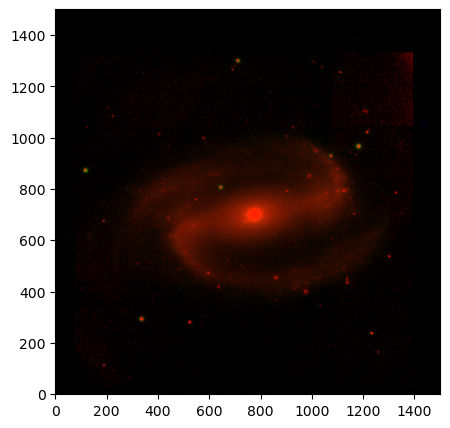

In [3]:
rgb_default = make_lupton_rgb(k, i, b)

plt.figure(figsize=(5,5))
plt.imshow(rgb_default, origin='lower')
plt.show()

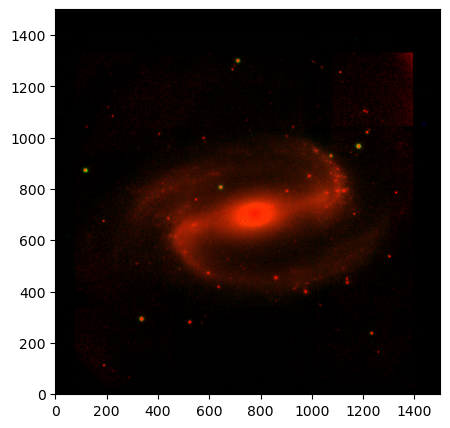

In [4]:
rgb_default = make_lupton_rgb(k, i, b, stretch=4, Q=2)

plt.figure(figsize=(5,5))
plt.imshow(rgb_default, origin='lower')
plt.show()

## 2. Imagen de Casiopeia A

En este ejercicio se continuará con el análisis de los datos del objeto Casiopeia A que se inició en clase.

- Lea los datos de Casiopeia A en la tres bandas de energía disponibles (`'casa_0.5-1.5keV.fits.gz'`, `'casa_1.5-3.0keV.fits.gz'` y `'casa_4.0-6.0keV.fits.gz'`).

- Realice una imagen de estos datos de Chandra para las tres bandas de energía, una junto a la otra (una fila, tres columnas) y ponga allí la información de la energía en el título de cada subplot.

- Obtenga una imagen combinada de los datos de Chandra mediante una composición RGB. Para que la imagen luzca mejor, recomiendo normalizar los datos de cada banda de energía utilizando el valor máximo de la banda respectiva. Para obtener la imágen puede combinar los datos dentro de un arreglo 3d con unaa forma compatible con la función `plt.imshow()` (revise la documentación de `matplotlib`!) o experimente con la función [make_lupton_rgb](http://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html#astropy.visualization.make_lupton_rgb) de `AstroPy`. También puede consultar el [tutorial](https://docs.astropy.org/en/stable/visualization/rgb.html#astropy-visualization-rgb) en la documentación de `AstroPy` y el paper de [Lupton et.al. (2004)](https://ui.adsabs.harvard.edu/abs/2004PASP..116..133L/abstract)

- Sume los datos de las tres bandas de energía y visualice esta información utilizando la función [plt.imshow()](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.imshow.html).

- Corte la región central de la imagen utilizando la función [astropy.nddata.Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html). El tamaño del corte debe ser de  $0.05$ deg $\times 0.05$ deg alrededor de la posición central de `'Cas A'`). 

- Encuentre la posición en el cielo del pixel más brillante en esta región cortada. Para ello puede utilizar la funciones  [np.argmax()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) y [np.unravel_index()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unravel_index.html). **Ayuda:** Asegurese de utilizar los atributos `.data` y `.wcs` actualizados para el objeto `Cutout2D`.
   
- Ahora se calculará un perfil radial de los datos de la imagen para estimar el tamaño del remanente de supernova. Para ello, defina dos radios (`radius_min` y `radius_max`) alrededor de la posición central de *Cas A*. Tome el radio mínimo como $0$ arcmin  y el radio maximo como $5$ arcmin y divida este rango con al menos 50 puntos intermedios. Sume todos los datos contenidos en cada uno de los anillos. Utilice la función [np.indices()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.indices.html) para obtener arreglos de las posiciones `x` y `y` de los pixeles, las cuales pueden ser transformados en posiciones en el cielo.  **Ayuda**: Puede utilizar un *masking* adecuado de los arreglos de `NumPy` para evitar realizar un loop sobre los radios de los anillos. La función [ndarray.reshape(-1, ...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape)puede ser útil para expandir los datos y los radios en una tercera dimensión. 

---
**Solución**

Lectura de los archivos y extracción de datos

In [5]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits


hdulist01 = fits.open('casa_0.5-1.5keV.fits.gz')
hdulist02 = fits.open('casa_1.5-3.0keV.fits.gz')
hdulist03 = fits.open('casa_4.0-6.0keV.fits.gz')

hdulist01.info()

Filename: casa_0.5-1.5keV.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (1024, 1024)   float32   


In [6]:
data01 = hdulist01[0].data
data02 = hdulist02[0].data
data03 = hdulist03[0].data

data01

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Imágenes del objeto en las diferentes bandas

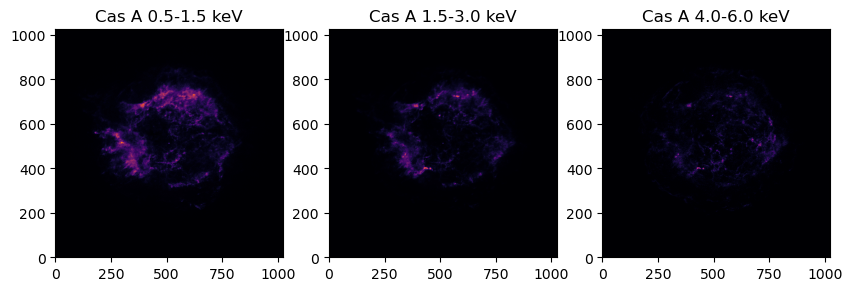

In [7]:
fig,ax = plt.subplots(1,3, figsize=(10,10))

ax[0].imshow(data01, origin='lower', cmap='inferno')
ax[0].set_title('Cas A 0.5-1.5 keV')
ax[1].imshow(data02, origin='lower', cmap='inferno')
ax[1].set_title('Cas A 1.5-3.0 keV')
ax[2].imshow(data03, origin='lower', cmap='inferno')
ax[2].set_title('Cas A 4.0-6.0 keV')
plt.show()

Composición RGB de la imágen

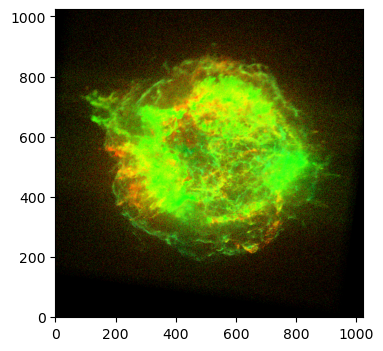

In [8]:
from astropy.visualization import make_lupton_rgb

rgb_default = make_lupton_rgb(data01, data02, data03,  stretch=5, Q=8)
plt.figure(figsize=(4,4))
plt.imshow(rgb_default, origin='lower')
plt.show()

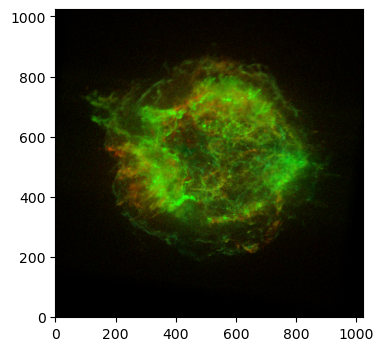

In [9]:
rgb_default = make_lupton_rgb(data01, data02, data03,  stretch=20, Q=15)
plt.figure(figsize=(4,4))
plt.imshow(rgb_default, origin='lower')
plt.show()

Suma de los datos e imágen combinada

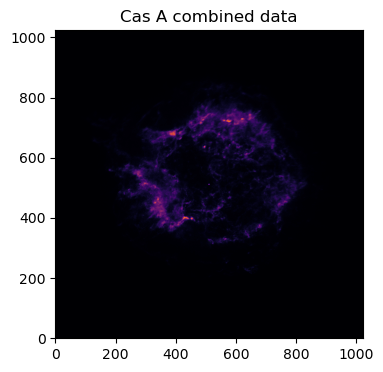

In [10]:
sum_data = data01 + data02 + data03

plt.figure(figsize=(4,4))
plt.imshow(sum_data, origin='lower', cmap='inferno')
plt.title('Cas A combined data')
plt.show()

Implementación del wcs para la imágen combinada

In [11]:
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

wcs = WCS(hdulist01[0].header)
wcs

Set MJD-END to 54442.838472 from DATE-END'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 350.8841248  58.78133011  
CRPIX : 445.5  289.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001366666693  0.0001366666693  
NAXIS : 1024  1024

In [12]:
position_casa = SkyCoord.from_name('Cas A')
position_casa

<SkyCoord (ICRS): (ra, dec) in deg
    (350.85, 58.815)>

In [13]:
position_casa.to_pixel(wcs)

(array(573.79215824), array(534.89801134))

In [14]:
ra = position_casa.icrs.ra.deg
dec = position_casa.icrs.dec.deg

Imágen con la ubicación de Casiopeia A de acuerdo con sus coordenadas astronómicas

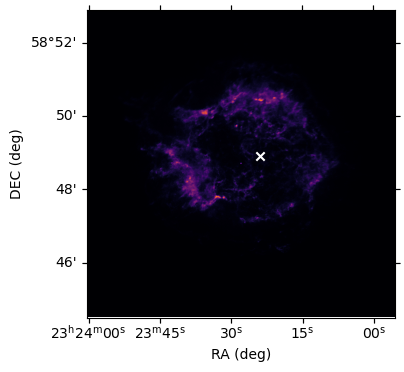

In [15]:
plt.figure(figsize=(4,4))
ax = plt.subplot(projection=wcs)
ax.imshow(sum_data, cmap='inferno', origin='lower')
ax.scatter(ra, dec, transform=ax.get_transform('icrs'), color='white', marker='x')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
plt.show()

Cutout de la imágen con un tamaño de 0.05 deg de lado 

In [16]:
from astropy.nddata import Cutout2D
from astropy import units as u

size = u.Quantity([0.05, 0.05], u.deg)
#cutout = Cutout2D(sum_data, (ra,dec), size, wcs=wcs, mode='trim', fill_value=nan, copy=False)
cutout = Cutout2D(sum_data, position_casa, size=size, wcs=wcs, mode='trim', copy=True)
cutout.data

array([[51., 60., 31., ...,  8., 11., 10.],
       [59., 70., 59., ..., 11., 12.,  8.],
       [62., 63., 33., ...,  7., 12.,  5.],
       ...,
       [16., 11., 14., ..., 10.,  7.,  9.],
       [16., 14.,  9., ...,  6., 15., 20.],
       [ 6., 10., 10., ..., 10.,  4.,  7.]], dtype=float32)

In [17]:
cutout.data.shape

(366, 366)

Imágen del cutout utilizando el wcs restringido al area de corte

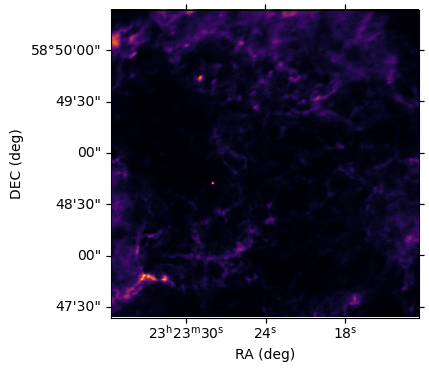

In [18]:
plt.figure(figsize=(4,4))
ax = plt.subplot(projection=cutout.wcs)
ax.imshow(cutout.data, cmap='inferno', origin='lower')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
plt.show()

Imágen completa indicando la ubicación del Cutout

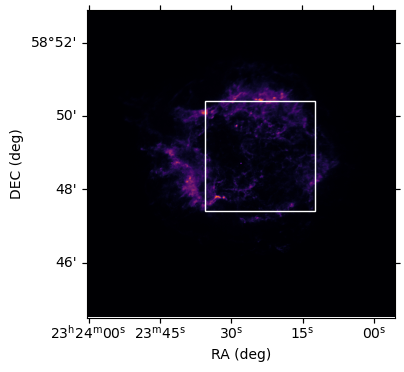

In [19]:
plt.figure(figsize=(4,4))
ax = plt.subplot(projection=wcs)
ax.imshow(sum_data, cmap='inferno', origin='lower')
cutout.plot_on_original(color='white')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
plt.show()

Pixel de mayor intensidad dentro del Cutout

In [20]:
np.max(cutout.data)

719.0

In [21]:
i_max,j_max = np.where(cutout.data == np.max(cutout.data))
i_max,j_max

(array([49]), array([39]))

In [22]:
cutout.data[i_max,j_max]

array([719.], dtype=float32)

In [23]:
position_max = SkyCoord.from_pixel(i_max, j_max, cutout.wcs)
position_max

<SkyCoord (ICRS): (ra, dec) in deg
    [(350.88531184, 58.79533844)]>

In [24]:
ra_max = position_max.icrs.ra.deg
dec_max = position_max.icrs.dec.deg

Imágen del Cutout indicando el pixel de mayor intensidad

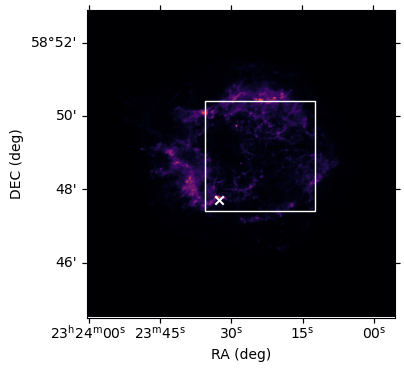

In [25]:
plt.figure(figsize=(4,4))
ax = plt.subplot(projection=wcs)
ax.imshow(sum_data, cmap='inferno', origin='lower')
cutout.plot_on_original(color='white')
ax.scatter(ra_max, dec_max, transform=ax.get_transform('icrs'), color='white', marker='x')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
plt.show()

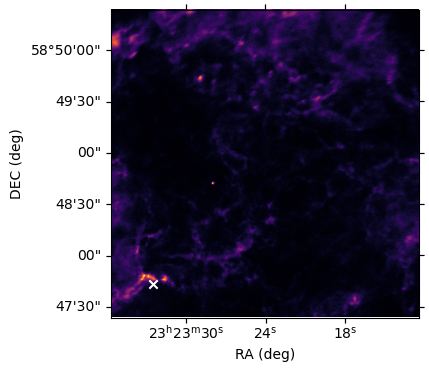

In [26]:
plt.figure(figsize=(4,4))
ax = plt.subplot(projection=cutout.wcs)
ax.imshow(cutout.data, cmap='inferno', origin='lower')
ax.scatter(ra_max, dec_max, transform=ax.get_transform('icrs'), color='white', marker='x')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
plt.show()

---


In [69]:
r_min = 0*u.arcmin.to('deg') #arcmin to deg
r_max = 5*u.arcmin.to('deg') #arcmin to deg

n_points = 50
rr = np.linspace(r_min,r_max,n_points)
intens = np.zeros(n_points)

In [90]:
for i in range(1024):
    for j in range(1024):
        ijcoords = SkyCoord.from_pixel(i,j,wcs=wcs)
        dist = position_casa.separation(ijcoords)
        if dist.value < rr[-1]:
            for k in np.arange(-1,-49,-1):
                if dist.value < rr[k] and dist.value > rr[k-1]:
                    intens[k] += sum_data[i,j]
                    break
    print(0.098*i, ' %')

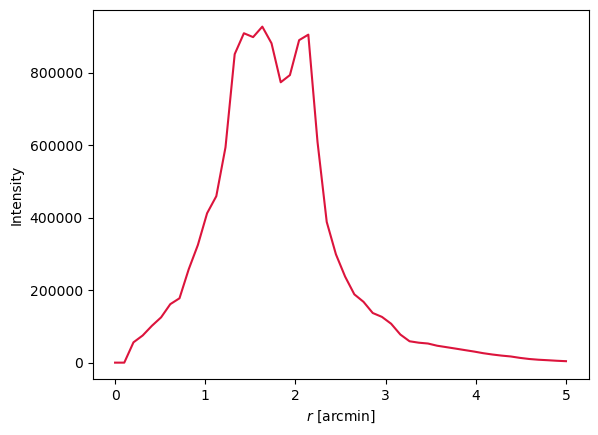

In [96]:
plt.figure()
plt.plot(rr*u.deg.to('arcmin'), intens, color='crimson')
plt.xlabel(r'$r$ [arcmin]')
plt.ylabel('Intensity')
plt.show()

## 3. El segundo catálogo Fermi-LAT de fuentes de alta energía (Second Fermi-LAT Catalog of High-Energy Sources **2FHL**)

Este catálogo del Large Area Telescope (LAT) que hace parte del Fermi Gamma-ray Space Telescope reporta las ubicaciones, espectros y propiedades de variación de 360 fuentes importantes detectadas en el rango de energias entre $50$ GeV y $2$ TeV durante los primeros 80 meses de la misión Fermi. Este catálogo también incluye 25 objetos extensos espacialmente.


Blazars y candidatos a blazars corresponden al 75% del catálogo, indicando que esta clase de fuentes domina las señales de altas energías en el cielo. Los remanentes de Supernova (SNRs) y las nebulosas de viento de pulsars (PWNe) en conjunto corresponden a la segunda clase de objetos principales, con un 10% del catálogo. 

El catálogo incluye 57 fuentes que no se encontraban en el catalogo 3FGL previo, 130 sourcefuentes que no se incluían en el catálogo 1FHL y 282 fuentes no detectadas por los Imaging Atmospheric Cherenkov Telescopes. Finalmente, el catálogo 2FHL incluye 48 fuentes que no pueden asociarse con objetos emisores de rayos gamma conocidos. 

El catálogo 2FHL completo puede ser descargado de

https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2FHL/

Sin embargo, para este ejercicio trabajaremos con una versión reducida denominada 'fermi_2fhl_catalog.fits', incluida en este repositorio.


- Lea los datos del catálogo Fermi 2FHL incluidos en el archivo 'fermi_2fhl_catalog.fits' y encuentre la fuente más brillante (los valores de brillo se encuentran en la columna `'Flux50'`). Cuál es el nombre común de éste objeto (columna `'ASSOC'`)? Encuentre todas las fuentes que se ubican dentro de un radio angular de $10$ deg  alrededor de este objeto.


- Realice un grafico de todo el cielo (utilizando una proyección `aitoff` en `PyPlot`) con todas las fuentes en el catálogo Fermi 2FHL agrupadas por clase de objeto (i.e. escogiendo un marcador de diferente color para cada clase de objeto). La clase de los objetos se guarda en la columna `'CLASS'`. Existen varias posibilidades para identificar estos grupos. Una de ellas es utilizar [Table.group_by()](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.group_by) seguido de un loop sobre los grupos (consulte la documentación de `AstroPy`!). Otra forma es utilizar un `set` de `Python` para identificar las clases existentes dentro de la columna `'CLASS'`  y luego hacer un loop sobre estos elementos. Puede utilizar `plt.subplot(projection='aitoff')` para iniciar un conjunto de ejes de `matplotlib` con la proyección `'aitoff'`. **Importante:** Nóte que la proyección `'aitoff'` requiere que las posiciones angulares esten dadas en radianes.

---
**Solución**

Lectura del archivo y extracción de los datos

In [29]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits


hdul = fits.open('fermi_2fhl_catalog.fits')

hdul.info()

Filename: fermi_2fhl_catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  2FHL Source Catalog    1 BinTableHDU    168   360R x 40C   [18A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, E, E, 2E, E, E, 2E, E, E, E, E, I, 25A, E, E, 8A, E, E, 18A, 18A, 18A]   
  2  Extended Sources    1 BinTableHDU     51   25R x 10C   [18A, E, E, E, E, 25A, E, E, I, 25A]   
  3  ROIs          1 BinTableHDU     39   154R x 6C   [I, E, E, E, E, E]   
  4  GTI           1 BinTableHDU     48   36589R x 2C   [D, D]   


In [30]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
FILENAME= 'gll_psch_v09.fit'                                                    
CREATOR = 'A. Dominguez'                                                        
CHECKSUM= '5HUdA9UZ7EUdA9UZ'   / HDU checksum updated 2016-03-07T05:35:58       
DATASUM = '0       '           / data unit checksum updated 2016-03-07T05:35:58 

In [31]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  251 / length of dimension 1                          
NAXIS2  =                  360 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   40 / number of table fields                         
TTYPE1  = 'Source_Name'                                                         
TFORM1  = '18A     '                                                            
TTYPE2  = 'RAJ2000 '                                                            
TFORM2  = 'E       '                                                            
TUNIT2  = 'deg     '        

In [32]:
from astropy.table import Table

data = Table(hdul[1].data)
data

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV,Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV,Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV,Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
str18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[2],float32,float32,float32[2],float32,float32,float32[2],float32,float32,float32,float32,int16,str25,float32,float32,str8,float32,float32,str18,str18,str18
2FHL J0008.1+4709,2.0437,47.1642,115.339355,-15.068757,0.06111402,0.098393574,28.64,6.24,2.75,3.96,3.19,2.16,4.21,1.23e-11,6.71e-12,1.21e-12,6.71e-13,3.3634447e-12,-1.5366806e-12 .. 2.1609453e-12,5.353536,4.3494674e-18,nan .. 4.7538935e-12,0.0,8.448714e-18,nan .. 7.291014e-12,0.0,4.0,68.15,0.99,1,MG4 J000800+4712,0.99721974,0.8348271,bll,2.1,2511884200000000.0,3FGL J0008.0+4713,1FHL J0007.7+4709,
2FHL J0009.3+5031,2.3435,50.5217,116.12411,-11.793202,0.045439195,0.0731571,53.97,5.08,1.66,nan,nan,nan,nan,1.91e-11,7.82e-12,2.03e-12,8.79e-13,8.362822e-12,-2.9896227e-12 .. 3.895122e-12,7.351317,2.9145808e-17,nan .. 5.1000337e-12,0.0,3.5087458e-16,nan .. 4.874578e-12,0.0,6.4,72.76,1.0,1,NVSS J000922+503028,0.99972373,0.7348077,bll,0.0,1412536400000000.0,3FGL J0009.3+5030,1FHL J0009.2+5032,
2FHL J0018.5+2947,4.6355,29.7879,114.46349,-32.54235,0.037093636,0.059720755,30.89,2.58,0.99,2.41,1.04,2.4,1.04,1.06e-11,6.15e-12,2.05e-12,1.72e-12,9.65438e-12,-5.5534162e-12 .. 5.5534162e-12,5.765786,1.1790023e-15,nan .. 5.378652e-12,0.0,1.6046534e-16,nan .. 6.120081e-12,0.0,3.0,127.32,1.0,3,RBS 0042,0.9998682,0.97852194,bll,0.1,5.9156075e+16,3FGL J0018.4+2947,1FHL J0018.6+2946,
2FHL J0022.0+0006,5.5001,0.1059,107.171715,-61.86175,0.05118522,0.082408205,29.96,1.86,0.57,0.95,0.72,0.88,0.71,1.97e-11,9.56e-12,6.86e-12,5.29e-12,1.6119727e-11,-7.1725507e-12 .. 9.9534886e-12,5.3821964,3.6392152e-12,-4.3863624e-12 .. 4.3863624e-12,1.3853942,8.423558e-16,nan .. 7.342399e-12,0.0,4.8,180.13,0.86,2,5BZGJ0022+0006,0.99928,0.90008944,bll-g,0.306,4.315193e+16,,,
2FHL J0033.6-1921,8.4115,-19.3575,94.28002,-81.22237,0.034838412,0.056089845,148.31,3.32,0.69,2.56,0.88,2.33,0.92,5.46e-11,1.5e-11,7.62e-12,2.69e-12,4.0016098e-11,-1.0161534e-11 .. 1.223782e-11,12.172502,2.1390131e-12,nan .. 8.258118e-12,0.9079581,2.439548e-17,nan .. 6.8422585e-12,0.0,13.8,170.01,0.99,2,KUV 00311-1938,0.999759,0.9814242,bll,0.61,8317639000000000.0,3FGL J0033.6-1921,1FHL J0033.6-1921,TeV J0033-193
2FHL J0035.8+5949,8.9625,59.8312,120.97197,-2.9812155,0.031602595,0.05088018,402.4,2.23,0.21,nan,nan,nan,nan,1.25e-10,1.9e-11,3.11e-11,7.23e-12,9.4229395e-11,-1.5256577e-11 .. 1.7157154e-11,17.312449,2.6699127e-11,-7.628179e-12 .. 9.450845e-12,10.390878,3.7260905e-16,nan .. 4.6744392e-12,0.0,46.5,247.62,0.96,4,1ES 0033+595,0.99995834,0.9928678,bll,0.0,1.3182593e+17,3FGL J0035.9+5949,1FHL J0035.9+5950,TeV J0035+598
2FHL J0040.3+4049,10.0949,40.8315,120.676285,-21.991812,0.035514843,0.057178896,26.76,2.12,0.81,nan,nan,nan,nan,1.05e-11,6.3e-12,2.84e-12,2.67e-12,7.415768e-12,-4.077804e-12 .. 6.4518156e-12,4.954423,3.0030787e-12,-2.317754e-12 .. 4.466438e-12,1.7083547,4.7316626e-16,nan .. 5.7980946e-12,0.0,3.2,258.77,0.85,3,B3 0037+405,0.9987379,0.9346999,bcu I,0.0,1.0,3FGL J0040.3+4049,1FHL J0040.3+4049,
2FHL J0043.9+3424,10.9755,34.4109,121.16442,-28.434984,0.059241667,0.095379084,39.5,4.57,1.61,3.46,1.85,2.95,1.91,1.83e-11,8.24e-12,2.03e-12,9.93e-13,9.657617e-12,-4.316866e-12 .. 4.316866e-12,6.3115244,8.758609e-17,nan .. 5.2433453e-12,0.0,9.438122e-16,nan .. 5.687869e-12,0.0,5.4,109.97,0.9,3,GB6 J0043+3426,0.99859357,0.8388443,fsrq,0.966,64565484000000.0,3FGL J0043.8+

Fuente con mayor flujo según la columna 'Flux50'

In [33]:
Flux50 = np.array(data['Flux50'])
np.max(Flux50)

1.31e-09

In [34]:
np.where(Flux50 == np.max(Flux50))

(array([85]),)

In [35]:
data[85]

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV,Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV,Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV,Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
str18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[2],float32,float32,float32[2],float32,float32,float32[2],float32,float32,float32,float32,int16,str25,float32,float32,str8,float32,float32,str18,str18,str18
2FHL J0534.5+2201,83.6341,22.0215,184.55202,-5.7798166,0.030250894,0.04870394,5149.74,2.13,0.07,nan,nan,nan,nan,1.31e-09,6.83e-11,3.52e-10,2.9e-11,9.94072e-10,-5.7595e-11 .. 5.947264e-11,63.575073,2.438754e-10,-2.8254246e-11 .. 3.0435404e-11,33.180733,5.2753586e-11,-1.3340122e-11 .. 1.6047759e-11,14.463924,377.7,1463.3,1.0,19,Crab,0.9983291,0.9969438,pwn,nan,nan,3FGL J0534.5+2201i,1FHL J0534.5+2201,TeV J0534+220p


In [36]:
data[85]['Flux50']

1.31e-09

In [37]:
data[85]['ASSOC']

'Crab'

Fuentes cercanas a la de mayor intensidad en un radio de 10 deg. 

In [38]:
from astropy.coordinates import SkyCoord
from astropy import units as u

position_crab = SkyCoord(data[85]['RAJ2000']*u.deg, data[85]['DEJ2000']*u.deg)
position_crab

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63410187, 22.02149963)>

In [39]:
nearest_object = []

for i in range(len(data)):
    pos = SkyCoord(data[i]['RAJ2000']*u.deg, data[i]['DEJ2000']*u.deg)
    if position_crab.separation(pos) <= 10*u.deg:
        nearest_object.append(i)

In [40]:
for i in nearest_object:
    print(data[i]['ASSOC'])

NVSS J051547+152716
TXS 0518+211
S147
Crab
IC 443


 Figura del cielo con la ubicación de las fuentes incluidas en el catálogo. El color indica la clase del objeto

In [41]:
RArad = data['RAJ2000']*u.deg.to('rad')
DErad = data['DEJ2000']*u.deg.to('rad')
data.add_column(RArad, name='RArad')
data.add_column(DErad, name='DErad')

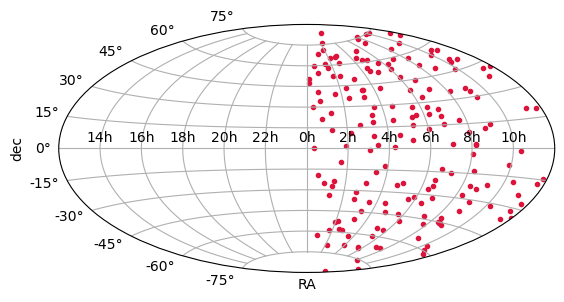

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='aitoff')
ax.grid(True)
ax.scatter(data['RArad'], data['DErad'], marker='.', color='crimson')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h']) #use if you want to change to a better version of RA. 
plt.xlabel('RA')
plt.ylabel('dec')
plt.show()

In [43]:
classLabels = np.unique(data['CLASS'])
classLabels.shape

(19,)

In [44]:
import matplotlib.patches as mpatches
import matplotlib as mpl

# Define the colormap discrete colors according 
# to the number of unique labels in ATold and
# create the legend handles for the plot

legend = []
colorChart = []
cmap = plt.cm.jet
for i in range(len(classLabels)):
    n = i*255//len(classLabels)
    legend.append(mpatches.Patch(color=cmap(n), label=classLabels[i]))
    colorChart.append(cmap(n))

# Create a new column with the colors assigned 
# to each label

colors = []
for d in data:
    for i in range(len(classLabels)):
        if d['CLASS']==classLabels[i]:
            colors.append(colorChart[i])

data.add_column(colors, name='colors')
data

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV,Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV,Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV,Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name,RArad,DErad,colors
str18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[2],float32,float32,float32[2],float32,float32,float32[2],float32,float32,float32,float32,int16,str25,float32,float32,str8,float32,float32,str18,str18,str18,float32,float32,float64[4]
2FHL J0008.1+4709,2.0437,47.1642,115.339355,-15.068757,0.06111402,0.098393574,28.64,6.24,2.75,3.96,3.19,2.16,4.21,1.23e-11,6.71e-12,1.21e-12,6.71e-13,3.3634447e-12,-1.5366806e-12 .. 2.1609453e-12,5.353536,4.3494674e-18,nan .. 4.7538935e-12,0.0,8.448714e-18,nan .. 7.291014e-12,0.0,4.0,68.15,0.99,1,MG4 J000800+4712,0.99721974,0.8348271,bll,2.1,2511884200000000.0,3FGL J0008.0+4713,1FHL J0007.7+4709,,0.035669293,0.82317054,0.0 .. 1.0
2FHL J0009.3+5031,2.3435,50.5217,116.12411,-11.793202,0.045439195,0.0731571,53.97,5.08,1.66,nan,nan,nan,nan,1.91e-11,7.82e-12,2.03e-12,8.79e-13,8.362822e-12,-2.9896227e-12 .. 3.895122e-12,7.351317,2.9145808e-17,nan .. 5.1000337e-12,0.0,3.5087458e-16,nan .. 4.874578e-12,0.0,6.4,72.76,1.0,1,NVSS J000922+503028,0.99972373,0.7348077,bll,0.0,1412536400000000.0,3FGL J0009.3+5030,1FHL J0009.2+5032,,0.040901788,0.88177,0.0 .. 1.0
2FHL J0018.5+2947,4.6355,29.7879,114.46349,-32.54235,0.037093636,0.059720755,30.89,2.58,0.99,2.41,1.04,2.4,1.04,1.06e-11,6.15e-12,2.05e-12,1.72e-12,9.65438e-12,-5.5534162e-12 .. 5.5534162e-12,5.765786,1.1790023e-15,nan .. 5.378652e-12,0.0,1.6046534e-16,nan .. 6.120081e-12,0.0,3.0,127.32,1.0,3,RBS 0042,0.9998682,0.97852194,bll,0.1,5.9156075e+16,3FGL J0018.4+2947,1FHL J0018.6+2946,,0.08090474,0.5198969,0.0 .. 1.0
2FHL J0022.0+0006,5.5001,0.1059,107.171715,-61.86175,0.05118522,0.082408205,29.96,1.86,0.57,0.95,0.72,0.88,0.71,1.97e-11,9.56e-12,6.86e-12,5.29e-12,1.6119727e-11,-7.1725507e-12 .. 9.9534886e-12,5.3821964,3.6392152e-12,-4.3863624e-12 .. 4.3863624e-12,1.3853942,8.423558e-16,nan .. 7.342399e-12,0.0,4.8,180.13,0.86,2,5BZGJ0022+0006,0.99928,0.90008944,bll-g,0.306,4.315193e+16,,,,0.09599485,0.0018483036,0.0 .. 1.0
2FHL J0033.6-1921,8.4115,-19.3575,94.28002,-81.22237,0.034838412,0.056089845,148.31,3.32,0.69,2.56,0.88,2.33,0.92,5.46e-11,1.5e-11,7.62e-12,2.69e-12,4.0016098e-11,-1.0161534e-11 .. 1.223782e-11,12.172502,2.1390131e-12,nan .. 8.258118e-12,0.9079581,2.439548e-17,nan .. 6.8422585e-12,0.0,13.8,170.01,0.99,2,KUV 00311-1938,0.999759,0.9814242,bll,0.61,8317639000000000.0,3FGL J0033.6-1921,1FHL J0033.6-1921,TeV J0033-193,0.14680837,-0.33785212,0.0 .. 1.0
2FHL J0035.8+5949,8.9625,59.8312,120.97197,-2.9812155,0.031602595,0.05088018,402.4,2.23,0.21,nan,nan,nan,nan,1.25e-10,1.9e-11,3.11e-11,7.23e-12,9.4229395e-11,-1.5256577e-11 .. 1.7157154e-11,17.312449,2.6699127e-11,-7.628179e-12 .. 9.450845e-12,10.390878,3.7260905e-16,nan .. 4.6744392e-12,0.0,46.5,247.62,0.96,4,1ES 0033+595,0.99995834,0.9928678,bll,0.0,1.3182593e+17,3FGL J0035.9+5949,1FHL J0035.9+5950,TeV J0035+598,0.15642513,1.0442514,0.0 .. 1.0
2FHL J0040.3+4049,10.0949,40.8315,120.676285,-21.991812,0.035514843,0.057178896,26.76,2.12,0.81,nan,nan,nan,nan,1.05e-11,6.3e-12,2.84e-12,2.67e-12,7.415768e-12,-4.077804e-12 .. 6.4518156e-12,4.954423,3.0030787e-12,-2.317754e-12 .. 4.466438e-12,1.7083547,4.7316626e-16,nan .. 5.7980946e-12,0.0,3.2,258.77,0.85,3,B3 0037+405,0.9987379,0.9346999,bcu I,0.0,1.0,3FGL J0040.3+4049,1FHL J0040.3+4049,,0.17618924,0.7126441,0.0 .. 1.0
2FHL J0043.9+3424,10.9755,34.4109,121.16442,-28.434984,0.059241667,0.095379084,39.5,4.57,1.61,3.

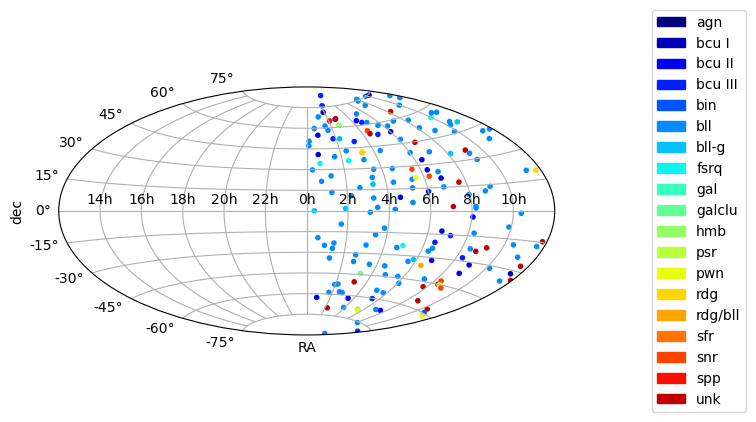

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='aitoff')
ax.grid(True)
ax.scatter(data['RArad'], data['DErad'], marker='.', c=data['colors'])
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h']) #use if you want to change to a better version of RA. 
plt.xlabel('RA')
plt.ylabel('dec')
plt.legend(handles=legend, loc='right', bbox_to_anchor=(1.4, 0.5))
plt.show()

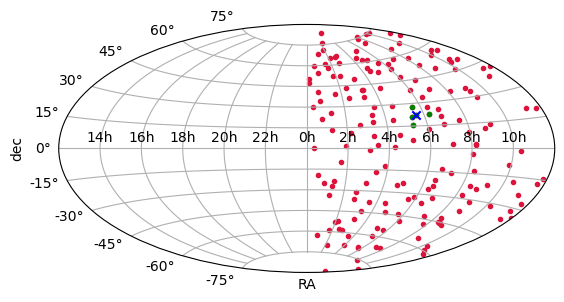

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='aitoff')
ax.grid(True)
ax.scatter(data['RArad'], data['DErad'], marker='.', color='crimson')
for i in nearest_object:
    ax.scatter(data[i]['RArad'], data[i]['DErad'], marker='.', color='green')
    
ax.scatter(data[85]['RArad'], data[85]['DErad'], marker='x', color='blue')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h']) #use if you want to change to a better version of RA. 
plt.xlabel('RA')
plt.ylabel('dec')
plt.show()